<a href="https://colab.research.google.com/github/wanessasilqueir/SRAG-no-brasil-2021/blob/main/SRAG_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos casos de Síndrome Respiratória Aguda Grave (SRAG) no Brasil

A análise a seguir traz informações acerca dos casos de SRAG no Brasil em 2021, enquadrado como o segundo ano de pandemia do SARS-CoV-2.

Este notebook traz a proposta de entender, através dos dados, como está o cenário de SRAG no Brasil em 2021 mesmo diante do avanço da vacinação. Após o carregamento dos dados, fiz algumas considerações e criei algumas variáveis novas para auxiliar na análise. Em seguida, respondi sequencialmente alguns questionamentos elaborados com o intuito de traçar o perfil dessa condição de saúde.

Os dados foram importados do dados.gov.br e a última atualizacão provida por eles foi em 04/10/2021


####Possíveis perguntas



1. Pergunta: Qual o perfil geral dos pacientes com SRAG no Brasil?
2. Pergunta: Quais os estados brasileiros com os maiores números de casos?
3. Pergunta: Como está o cenário de evolução do doença?
4. Pergunta: Há desigualdade em relação ao gênero nos casos de SRAG?
5. Pergunta: Qual o número de internações?
6. Pergunta: Qual o diagnótico final de SRAG?
7. Pergunta: Qual o cenário de sintomas e comorbidades em relação às diferentes classificações de SRAG?
8. Pergunta: Como está os casos de SRAG em crianças até 5 anos?

####Importando o arquivo com a biblioteca Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-20-02-2023.csv"

df = pd.read_csv(url, sep=';')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,53,57,59,61,62,63,66,67,91,93,105,107,114,116,117,118,120,121,122,128,143,145,148) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,04/01/2021,1,04/01/2021,1,MG,SETE LAGOAS,1467.0,CURVELO,312090,HOSPITAL SANTO ANTONIO,2178559,F,09/03/1947,73,3,3073,5,4,9.0,BRASIL,1,MG,SETE LAGOAS,1467.0,CURVELO,312090.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,30/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,05/01/2021,MG,SETE LAGOAS,1467.0,CURVELO,312090.0,1.0,05/01/2021,NaN,2.0,2.0,NaN,05/01/2021,1.0,05/01/2021,1.0,NaN,2.0,05/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,06/01/2021,27/01/2021,06/01/2021,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/01/2021,1,05/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,HOSPITAL ALIANCA,2389746,F,08/12/1946,74,3,3074,6,9,9.0,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,1.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,"HAS,DLP,DAOP",9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,05/01/2021,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,1.0,05/01/2021,11/01/2021,1.0,9.0,NaN,NaN,1.0,06/01/2021,1.0,NaN,2.0,07/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,14/01/2021,06/01/2021,06/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,18/03/2021,15/04/2021,NaN,86 - COVID-19-CORONAVAC-SINOVAC/BUTANTAN,NaN,NaN,NaN,86 - COVID-19-CORONAVAC-SINOVAC/BUTANTAN,210053,210081,2.0
2,08/01/2021,1,07/01/2021,1,SP,GVE X OSASCO,1335.0,TABOAO DA SERRA,355280,UNIDADE MISTA DE SAUDE DE TABOAO DA SERRA,2785188,M,26/05/2019,1,3,3001,6,4,NaN,BRASIL,1,SP,GVE X OSASCO,1335.0,EMBU DAS ARTES,351500.0,1.0,NaN,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,1.0,1.0,OTALGIA,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,08/01/2021,1.0,08/01/2021,SP,GVE X OSASCO,1335.0,TABOAO DA SERRA,355280.0,2.0,NaN,NaN,2.0,3.0,NaN,08/01/2021,1.0,08/01/2021,1.0,NaN,2.0,11/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,12/01/2021

####Pré-processamento de dados

In [6]:
#criando uma cópia pois o df (original) demoraria muito pra rodar caso eu precisasse rodar tudo do início
dados = df.copy()

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
#selecionando apenas dados de 2021
dados['DT_NOTIFIC'] = pd.to_datetime(dados['DT_NOTIFIC'])
dados = dados.loc[(dados['DT_NOTIFIC'] >= '01/01/2021') & (dados['DT_NOTIFIC'] <= '12/12/2021')]

In [9]:
len(dados)

1663867

##### Descarte de variáveis 

In [10]:
dados.drop(['SEM_NOT', 'SEM_PRI', 'CO_PAIS',	'TP_IDADE', 'CS_GESTANT', 'POS_PCRFLU', 'ID_PAIS', 'DT_PCR', 'M_AMAMENTA', 'CO_RG_INTE', 'SG_UF', 'ID_RG_RESI','COD_IDADE', 'CO_RG_RESI', 'CO_MUN_RES','TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'OUTRO_DES', 'OBES_IMC', 'OUT_MORBI', 'MORB_DESC', 'MAE_VAC', 'DT_VAC_MAE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_1_DOSE', 'SG_UF_INTE', 'ID_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'PCR_RESUL', 'TP_FLU_PCR',	'PCR_FLUASU',	'FLUASU_OUT',	'PCR_FLUBLI',	'FLUBLI_OUT',	'POS_PCROUT',	'PCR_VSR',	'PCR_PARA1', 'PCR_PARA2',	'PCR_PARA3',	'PCR_PARA4',	'PCR_ADENO',	'PCR_METAP',	'PCR_BOCA',	'PCR_RINO',	'PCR_OUTRO',	'DS_PCR_OUT', 'CLASSI_OUT',	'CRITERIO', 'DT_ENCERRA',	'DT_DIGITA',	'HISTO_VGM',	'PAIS_VGM',	'CO_PS_VGM',	'LO_PS_VGM',	'DT_VGM',	'DT_RT_VGM',	'PCR_SARS2',	'PAC_COCBO',	'PAC_DSCBO',	'OUT_ANIM',	'TOMO_RES',	'TOMO_OUT',	'DT_TOMO',	'TP_TES_AN',	'DT_RES_AN',	'RES_AN',	'POS_AN_FLU',	'TP_FLU_AN',	'POS_AN_OUT',	'AN_SARS2',	'AN_VSR',	'AN_PARA1',	'AN_PARA2',	'AN_PARA3',	'AN_ADENO',	'AN_OUTRO',	'DS_AN_OUT',	'TP_AM_SOR',	'SOR_OUT',	'DT_CO_SOR',	'TP_SOR',	'OUT_SOR',	'DT_RES',	'RES_IGG',	'RES_IGM',	'RES_IGA',	'ESTRANG', 'LAB_PR_COV',	'LOTE_1_COV',	'LOTE_2_COV',	'FNT_IN_COV', 'DOSE_1_COV',	'DOSE_2_COV', 'DT_ENTUTI', 'DT_SAIDUTI', 'DT_UT_DOSE', 'DT_2_DOSE'], axis = 1, inplace = True)

In [11]:
dados["índice"]=dados.index

dados.head(3)

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_MN_RESI,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA,ANTIVIRAL,HOSPITAL,DT_INTERNA,UTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,índice
0,2021-04-01,04/01/2021,MG,SETE LAGOAS,1467.0,CURVELO,312090,HOSPITAL SANTO ANTONIO,2178559,F,09/03/1947,73,4,9.0,CURVELO,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,05/01/2021,1.0,2.0,4.0,1.0,06/01/2021,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2021-05-01,05/01/2021,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,HOSPITAL ALIANCA,2389746,F,08/12/1946,74,9,9.0,SALVADOR,1.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,9.0,1.0,05/01/2021,1.0,1.0,4.0,1.0,14/01/2021,2.0,1.0,2.0,2.0,1.0,NaN,86 - COVID-19-CORONAVAC-SINOVAC/BUTANTAN,NaN,NaN,NaN,1
2,2021-08-01,07/01/2021,SP,GVE X OSASCO,1335.0,TABOAO DA SERRA,355280,UNIDADE MISTA DE SAUDE DE TABOAO DA SERRA,2785188,M,26/05/2019,1,4,NaN,EMBU DAS ARTES,1.0,NaN,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,08/01/2021,2.0,2.0,4.0,1.0,12/01/2021,2.0,1.0,2.0,2.0,1.0,NaN,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,NaN,NaN,NaN,2


In [12]:
dados[[ 'CS_RACA', 'CS_ESCOL_N', 'CS_ZONA',	'SURTO_SG',	'NOSOCOMIAL',	'AVE_SUINO',	'FEBRE',	'TOSSE',	'GARGANTA',	'DISPNEIA',	'DESC_RESP',	'SATURACAO',	'DIARREIA',	'VOMITO',	'OUTRO_SIN',	'PUERPERA', 'CARDIOPATI',	'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL', 'OBESIDADE',	'VACINA', 'ANTIVIRAL',	'HOSPITAL', 'UTI', 'SUPORT_VEN', 'FATOR_RISC',	'CLASSI_FIN',	'EVOLUCAO', 'DOR_ABD',	'FADIGA',	'PERD_OLFT',	'PERD_PALA',	'VACINA_COV']] = dados[[ 'CS_RACA', 'CS_ESCOL_N', 'CS_ZONA',	'SURTO_SG',	'NOSOCOMIAL',	'AVE_SUINO',	'FEBRE',	'TOSSE',	'GARGANTA',	'DISPNEIA',	'DESC_RESP',	'SATURACAO',	'DIARREIA',	'VOMITO',	'OUTRO_SIN',	'PUERPERA', 'CARDIOPATI',	'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL', 'OBESIDADE',	'VACINA', 'ANTIVIRAL',	'HOSPITAL', 'UTI', 'SUPORT_VEN', 'FATOR_RISC',	'CLASSI_FIN',	'EVOLUCAO', 'DOR_ABD',	'FADIGA',	'PERD_OLFT',	'PERD_PALA',	'VACINA_COV']].fillna(0).astype(np.int64)

#####Fazendo um dicionário para as variáveis

Na tabela, algumas variáveis descritivas vieram como númericas e isso será corrigido. Além disso, algumas das colunas podem ser agrupadas para uma facilitar uma única análise, como os sintomas dos pacientes e as comorbidades que eles têm.



In [13]:
prefixo1 = "SINT"
prefixo2 = "CRONIC"


lista1 = ['FEBRE', 'TOSSE',	'GARGANTA',	'DISPNEIA',	'DIARREIA',	'VOMITO',	'PUERPERA',	'DOR_ABD', 'FADIGA', 
            'PERD_OLFT', 'PERD_PALA']
lista2 = ['CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL']


mapeamento_colunas1 = {coluna: prefixo1 + "_" + coluna for coluna in lista1}
mapeamento_colunas2 = {coluna: prefixo2 + "_" + coluna for coluna in lista2}


dados = dados.rename(columns=mapeamento_colunas1)
dados = dados.rename(columns=mapeamento_colunas2)

In [14]:
dados['SINT_TOSSE'].value_counts()

1    1113623
2     308152
0     225767
9      16325
Name: SINT_TOSSE, dtype: int64

In [15]:
#redefinindo os valores das variáveis

lista3 = ['SINT_FEBRE', 'SINT_TOSSE',	'SINT_GARGANTA',	'SINT_DISPNEIA',	'SINT_DIARREIA',	'SINT_VOMITO',	'SINT_PUERPERA',	'SINT_DOR_ABD', 'SINT_FADIGA', 
            'SINT_PERD_OLFT', 'SINT_PERD_PALA', 'CRONIC_CARDIOPATI', 'CRONIC_SIND_DOWN', 'CRONIC_HEPATICA', 'CRONIC_ASMA', 
          'CRONIC_DIABETES', 'CRONIC_NEUROLOGIC', 'CRONIC_PNEUMOPATI', 'CRONIC_IMUNODEPRE', 'CRONIC_RENAL']

for column in lista3:
  dados[column]= dados[column].map({1:'Sim', 2:'Não', 9:'Ignorado'})

In [16]:
#fazendo o mesmo com outras variáveis
dic = {'M': 'Masculino', 'F': 'Feminino'}
dados['SEXO'] = dados['CS_SEXO'].map(dic)

dic = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'}
dados['RAÇA'] = dados['CS_RACA'].map(dic)

dic = {0: 'Sem escolaridade/Analfabeto', 1: 'Fundamental 1º ciclo (1ª a 5ª série)', 2: 'Fundamental 2º ciclo (6ª a 9ª série)', 3: 'Médio (1º ao 3º ano)', 4: 'Superior', 5: 'Não se aplica', 9: 'Ignorado'} 
dados['ESCOLARIDADE'] = dados['CS_ESCOL_N'].map(dic)

dic = {1: 'Urbana', 2: 'Rural', 3: 'Periurbana', 9: 'Ignorado'}
dados['ZONA'] = dados['CS_ZONA'].map(dic)

dic = {1: 'Sim, invasivo', 2: 'Sim, não invasivo', 3: 'Não', 9: 'Ignorado'}
dados['SUPORT_VENTILATÓRIO'] = dados['SUPORT_VEN'].map(dic)

dic = {1: 'SRAG por influenza', 2: 'SRAG por outro vírus respiratório', 3: 'SRAG por outro agente etiológico', 4: 'SRAG não especificado', 5: 'SRAG por covid-19'}
dados['CLASSI_FINAL'] = dados['CLASSI_FIN'].map(dic)

dic = {1: 'Cura', 2: 'Óbito', 3: 'Óbito por outras causas', 9: 'Ignorado'}
dados['EVOLUCAO'] = dados['EVOLUCAO'].map(dic)


lista4 = ['VACINA', 'ANTIVIRAL', 'HOSPITAL', 'UTI', 'VACINA_COV']
dic_all = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}

for column in lista4:
  dados[column] = dados[column].map(dic_all)

In [17]:
cortes = [0, 5, 11, 16, 24, 30, 40, 50, 60, 70, 80, 90, 100]
nomes = ['[0,5]', '[6,11]','[12,17]', '[18,24]', '[25,30]', '[31,40]', '[41,50]', '[51,60]', '[61-70]', '[71,80]', '[81,90]', '[91-100]']
dados['IDADE'] = pd.cut(dados["NU_IDADE_N"], bins = cortes, labels = nomes) # ---> uma nova coluna foi adicionada com essa nova faixa

#####Panorama geral dos dados depois do pré-processamento

In [20]:
dados.shape

(1663867, 68)

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663867 entries, 0 to 1732627
Data columns (total 68 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DT_NOTIFIC           1663867 non-null  datetime64[ns]
 1   DT_SIN_PRI           1663867 non-null  object        
 2   SG_UF_NOT            1663867 non-null  object        
 3   ID_REGIONA           1473097 non-null  object        
 4   CO_REGIONA           1473097 non-null  float64       
 5   ID_MUNICIP           1663867 non-null  object        
 6   CO_MUN_NOT           1663867 non-null  int64         
 7   ID_UNIDADE           1663867 non-null  object        
 8   CO_UNI_NOT           1663867 non-null  int64         
 9   CS_SEXO              1663867 non-null  object        
 10  DT_NASC              1662716 non-null  object        
 11  NU_IDADE_N           1663867 non-null  int64         
 12  CS_RACA              1663867 non-null  int64         
 1

In [22]:
dados.isnull().sum() 

DT_NOTIFIC                   0
DT_SIN_PRI                   0
SG_UF_NOT                    0
ID_REGIONA              190770
CO_REGIONA              190770
ID_MUNICIP                   0
CO_MUN_NOT                   0
ID_UNIDADE                   0
CO_UNI_NOT                   0
CS_SEXO                      0
DT_NASC                   1151
NU_IDADE_N                   0
CS_RACA                      0
CS_ESCOL_N                   0
ID_MN_RESI                 242
CS_ZONA                      0
SURTO_SG                     0
NOSOCOMIAL                   0
AVE_SUINO                    0
SINT_FEBRE              297842
SINT_TOSSE              225767
SINT_GARGANTA           516208
SINT_DISPNEIA           213041
DESC_RESP                    0
SATURACAO                    0
SINT_DIARREIA           535725
SINT_VOMITO             553634
OUTRO_SIN                    0
SINT_PUERPERA          1106812
FATOR_RISC                   0
CRONIC_CARDIOPATI       930369
HEMATOLOGI                   0
CRONIC_S

In [23]:
dados.isnull().mean()[ dados.isnull().sum() != 0 ].sort_values(ascending = False) 

LOTE_REF               0.985595
FAB_COVREF             0.985481
DOSE_REF               0.985396
FAB_COV_2              0.973703
FAB_COV_1              0.802282
CRONIC_SIND_DOWN       0.666363
CRONIC_HEPATICA        0.666324
SINT_PUERPERA          0.665205
CRONIC_IMUNODEPRE      0.662048
CRONIC_RENAL           0.659503
CRONIC_ASMA            0.658396
CRONIC_NEUROLOGIC      0.657406
CRONIC_PNEUMOPATI      0.657343
CRONIC_DIABETES        0.591319
CRONIC_CARDIOPATI      0.559161
SINT_DOR_ABD           0.345353
SINT_PERD_PALA         0.337401
SINT_PERD_OLFT         0.337035
SINT_VOMITO            0.332739
SINT_DIARREIA          0.321976
SINT_GARGANTA          0.310246
SINT_FADIGA            0.302558
VACINA                 0.274935
VACINA_COV             0.267931
ANTIVIRAL              0.181585
SINT_FEBRE             0.179006
DT_EVOLUCA             0.150016
SINT_TOSSE             0.135688
UTI                    0.133513
SUPORT_VENTILATÓRIO    0.133455
SINT_DISPNEIA          0.128040
ID_REGIO

####Análise exploratória



###### 1. Qual o perfil geral dos pacientes com SRAG no Brasil?

In [26]:
round(dados["NU_IDADE_N"].mean())

54

In [27]:
dados["SEXO"].mode()

0    Masculino
dtype: object

In [28]:
dados["IDADE"].mode()

0    [51,60]
Name: IDADE, dtype: category
Categories (12, object): ['[0,5]' < '[6,11]' < '[12,17]' < '[18,24]' ... '[61-70]' < '[71,80]' <
                          '[81,90]' < '[91-100]']

In [29]:
dados["RAÇA"].mode()

0    Branca
dtype: object

In [30]:
dados["SG_UF_NOT"].mode()

0    SP
dtype: object

In [31]:
dados["CLASSI_FINAL"].mode()

0    SRAG por covid-19
dtype: object

In [32]:
dados["EVOLUCAO"].mode()

0    Cura
dtype: object

In [33]:
dados["ZONA"].mode()

0    Urbana
dtype: object

######2. Quais os estados brasileiros com os maiores números de casos?

In [34]:
n = dados.shape[0]

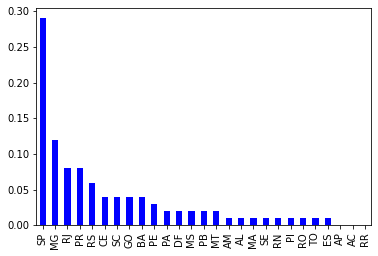

In [35]:
(dados['SG_UF_NOT'].fillna(0).value_counts()/n).round(2).plot(kind = 'bar', 
                                                                                 color = ['blue']);

Os estados de São Paulo, Minas Gerais e Rio de Janeiro ocupam o 1°, 2° e 3° lugar entre as cidades com maiores notificações de casos de SRAG no Brasil. Esse resultado foi proporcional à quantidade de habitantes presentes em cada estado.

######3. Como está o cenário de evolução do doença?


In [36]:
dados['EVOLUCAO'].value_counts()

Cura                       1023972
Óbito                       427235
Ignorado                     41590
Óbito por outras causas      21133
Name: EVOLUCAO, dtype: int64

In [37]:
(dados['EVOLUCAO'].value_counts()/n).round(2) 

Cura                       0.62
Óbito                      0.26
Ignorado                   0.02
Óbito por outras causas    0.01
Name: EVOLUCAO, dtype: float64

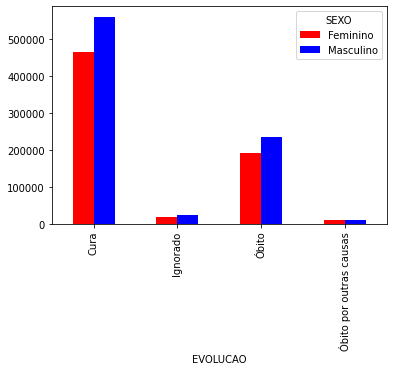

In [38]:
dados.groupby(['SEXO', 'EVOLUCAO']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue']);

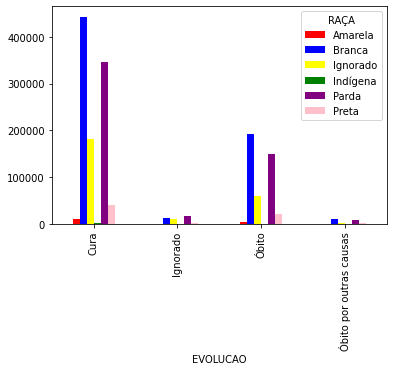

In [39]:
dados.groupby(['RAÇA', 'EVOLUCAO']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue', 'yellow', 'green', 'purple', 'pink']);

######4. Há desigualdade em relação ao gênero nos casos de SRAG?

In [40]:
(dados['SEXO'].fillna(0).value_counts()/n).round(2) 

Masculino    0.55
Feminino     0.45
0            0.00
Name: SEXO, dtype: float64

In [41]:
(dados.groupby(['SEXO', 'IDADE']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

IDADE,"[0,5]","[6,11]","[12,17]","[18,24]","[25,30]","[31,40]","[41,50]","[51,60]",[61-70],"[71,80]","[81,90]",[91-100]
SEXO,,,,,,,,,,,,
Feminino,0.02,0.01,0.0,0.01,0.02,0.04,0.06,0.08,0.08,0.07,0.04,0.01
Masculino,0.03,0.01,0.0,0.01,0.02,0.07,0.09,0.11,0.09,0.07,0.04,0.01


In [42]:
dados.groupby(['SEXO', 'RAÇA']).count()['índice'].unstack().T

SEXO,Feminino,Masculino
RAÇA,,
Amarela,6636,8510
Branca,323031,378922
Ignorado,127145,158985
Indígena,1255,1467
Parda,263632,323133
Preta,31633,39239


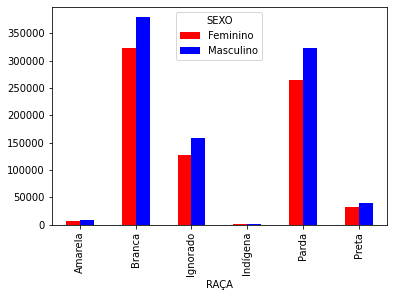

In [43]:
dados.groupby(['SEXO', 'RAÇA']).count()['índice'].unstack().T.plot(kind = 'bar', 
                                                                                 color = ['red', 'blue']);

In [44]:
dados.groupby(['SEXO', 'ESCOLARIDADE']).count()['índice'].unstack().T

SEXO,Feminino,Masculino
ESCOLARIDADE,,
Fundamental 1º ciclo (1ª a 5ª série),71976,78736
Fundamental 2º ciclo (6ª a 9ª série),46401,56166
Ignorado,222281,265822
Médio (1º ao 3º ano),73934,100089
Não se aplica,19934,24963
Sem escolaridade/Analfabeto,289396,341938
Superior,29410,42542


In [45]:
(dados['ESCOLARIDADE'].value_counts()/n).round(2) 

Sem escolaridade/Analfabeto             0.38
Ignorado                                0.29
Médio (1º ao 3º ano)                    0.10
Fundamental 1º ciclo (1ª a 5ª série)    0.09
Fundamental 2º ciclo (6ª a 9ª série)    0.06
Superior                                0.04
Não se aplica                           0.03
Name: ESCOLARIDADE, dtype: float64

######5. Qual o número de internações?

In [46]:
(dados['UTI'].fillna(0).value_counts()/n).round(2)

Não         0.55
Sim         0.29
0           0.13
Ignorado    0.02
Name: UTI, dtype: float64

In [47]:
(dados.groupby(['SEXO', 'UTI']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

UTI,Ignorado,Não,Sim
SEXO,,,
Feminino,0.01,0.25,0.13
Masculino,0.01,0.30,0.16


In [48]:
(dados.groupby(['IDADE', 'UTI']).count()['índice']/n).round(2).sort_values(ascending = False).unstack()

UTI,Ignorado,Não,Sim
IDADE,,,
"[0,5]",0.0,0.03,0.01
"[6,11]",0.0,0.01,0.00
"[12,17]",0.0,0.00,0.00
"[18,24]",0.0,0.01,0.00
"[25,30]",0.0,0.02,0.01
"[31,40]",0.0,0.07,0.03
"[41,50]",0.0,0.09,0.04
"[51,60]",0.0,0.10,0.06
[61-70],0.0,0.09,0.06


######6. Qual o diagnótico final de SRAG?

In [49]:
#classificação final do caso de SRAG
lista = ['SRAG por influenza', 'SRAG por outro vírus respiratório', 'SRAG não especificado', 'SRAG por covid-19', 'SRAG por outro vírus respiratório']

clas_fin = dados[dados['CLASSI_FINAL'].isin(lista)]

SRAGi = dados[dados['CLASSI_FINAL'] == 'SRAG por influenza'] 
SRAGvr = dados[dados['CLASSI_FINAL'] == 'SRAG por outro vírus respiratório'] 
SRAGne = dados[dados['CLASSI_FINAL'] == 'SRAG não especificado'] 
SRAGcov = dados[dados['CLASSI_FINAL'] == 'SRAG por covid-19'] 
SRAGve = dados[dados['CLASSI_FINAL'] == 'SRAG por outro vírus respiratório'] 

In [50]:
clas_fin.groupby('CLASSI_FINAL').count()['índice']

CLASSI_FINAL
SRAG não especificado                 366774
SRAG por covid-19                    1194003
SRAG por influenza                      2069
SRAG por outro vírus respiratório      18418
Name: índice, dtype: int64

In [51]:
clas_fin.groupby(['CLASSI_FINAL', 'EVOLUCAO']).count()['índice'].unstack()

EVOLUCAO,Cura,Ignorado,Óbito,Óbito por outras causas
CLASSI_FINAL,,,,
SRAG não especificado,262970,15330,50965,17440
SRAG por covid-19,738608,25406,373486,2850
SRAG por influenza,1522,76,195,11
SRAG por outro vírus respiratório,16844,338,554,117


In [62]:
(SRAGcov.groupby(['EVOLUCAO']).count()['índice']/n).round(2)

EVOLUCAO
Cura                       0.44
Ignorado                   0.02
Óbito                      0.22
Óbito por outras causas    0.00
Name: índice, dtype: float64

In [53]:
clas_fin.groupby(['CLASSI_FINAL', 'IDADE']).count()['índice'].unstack()

IDADE,"[0,5]","[6,11]","[12,17]","[18,24]","[25,30]","[31,40]","[41,50]","[51,60]",[61-70],"[71,80]","[81,90]",[91-100]
CLASSI_FINAL,,,,,,,,,,,,
SRAG não especificado,56665,23433,5436,11712,11367,24617,30807,41793,52767,52876,40669,11344
SRAG por covid-19,8690,4632,3317,19929,42426,150465,214677,257939,223807,162290,86082,18509
SRAG por influenza,275,142,49,154,144,214,207,198,222,238,164,60
SRAG por outro vírus respiratório,11794,3650,351,377,185,242,211,302,355,385,310,75


In [54]:
clas_fin.groupby(['CLASSI_FINAL', 'OBESIDADE']).count()['índice'].unstack()


OBESIDADE,0,1,2,9
CLASSI_FINAL,,,,
SRAG não especificado,234654,15230,113443,3447
SRAG por covid-19,749156,113518,321059,10270
SRAG por influenza,1645,69,346,9
SRAG por outro vírus respiratório,15263,168,2929,58


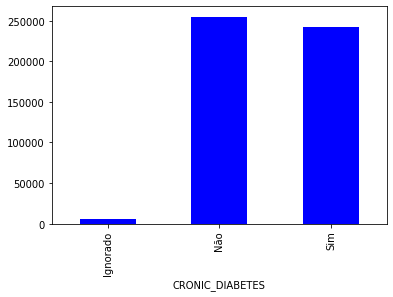

In [55]:
SRAGcov.groupby(['CRONIC_DIABETES']).count()['índice'].plot(kind = 'bar', 
                                                                                 color = ['blue']);

######7. Qual o cenário de sintomas e comorbidades em relação às diferentes classificações de SRAG?

Para responder essas perguntas iremos usar o RegEx, ou Expressão Regular,  que é uma sequência de caracteres que forma um padrão de pesquisa. O RegEx pode ser usado para verificar se uma string contém o padrão de pesquisa especificado.

In [63]:
colunas_sint = dados.filter(regex='SINT').columns.tolist()

# lista para armazenar as porcentagens de valores "Sim" em cada coluna
porcentagens = []

for coluna in colunas_sint:
    porcentagem_sim = (dados[coluna].value_counts(normalize=True)['Sim'] * 100).round(2)
    porcentagens.append(porcentagem_sim)

df_porcentagens = pd.DataFrame({
    'Coluna': colunas_sint,
    'Contribuição %': porcentagens
})


df_porcentagens = df_porcentagens.sort_values(by='Contribuição %', ascending=False)
print(df_porcentagens)

            Coluna  Contribuição %
3    SINT_DISPNEIA           79.69
1       SINT_TOSSE           77.44
0       SINT_FEBRE           63.44
8      SINT_FADIGA           35.30
2    SINT_GARGANTA           23.14
4    SINT_DIARREIA           17.75
5      SINT_VOMITO           12.93
10  SINT_PERD_PALA           12.65
9   SINT_PERD_OLFT           12.43
7     SINT_DOR_ABD            9.31
6    SINT_PUERPERA            0.90


In [57]:
#outra forma de fazer só que como código de uma linha
# pd.DataFrame([(col, dados[col].value_counts(normalize=True)['Sim'] * 100) for col in dados.filter(regex='SINT').columns.tolist()], columns=['Sintomas', 'Contribuição %']).sort_values(by='Contribuição %', ascending=False).round(2)

,Sintomas,Contribuição %
3,SINT_DISPNEIA,79.69
1,SINT_TOSSE,77.44
0,SINT_FEBRE,63.44
8,SINT_FADIGA,35.30
2,SINT_GARGANTA,23.14
4,SINT_DIARREIA,17.75
5,SINT_VOMITO,12.93
10,SINT_PERD_PALA,12.65
9,SINT_PERD_OLFT,12.43
7,SINT_DOR_ABD,9.31


In [65]:
# lista de dataframes
dfs = [
    (SRAGi, 'SRAGi'),
    (SRAGvr, 'SRAGvr'),
    (SRAGne, 'SRAGne'),
    (SRAGcov, 'SRAGcov'),
    (SRAGve, 'SRAGve')
]

results = [df[0].filter(regex='^SINT').apply(lambda x: (x == 'Sim').mean() * 100).round(2) for df in dfs]

# concatenando
result = pd.concat(results, axis=1, keys=[df[1] for df in dfs])
result.index.name = 'Coluna'

print(result)

                SRAGi  SRAGvr  SRAGne  SRAGcov  SRAGve
Coluna                                                
SINT_FEBRE      58.77   56.96   43.24    54.81   56.96
SINT_TOSSE      72.64   84.75   60.13    68.79   84.75
SINT_GARGANTA   20.44    7.86   11.55    17.52    7.86
SINT_DISPNEIA   50.65   63.12   63.07    72.15   63.12
SINT_DIARREIA    5.99    8.34    9.37    13.09    8.34
SINT_VOMITO      7.30   13.00   10.61     8.04   13.00
SINT_PUERPERA    0.72    0.21    0.47     0.26    0.21
SINT_DOR_ABD     4.78    3.21    6.63     6.06    3.21
SINT_FADIGA     15.51   11.74   18.01    27.40   11.74
SINT_PERD_OLFT   3.67    1.03    2.86    10.19    1.03
SINT_PERD_PALA   4.06    0.87    2.89    10.37    0.87


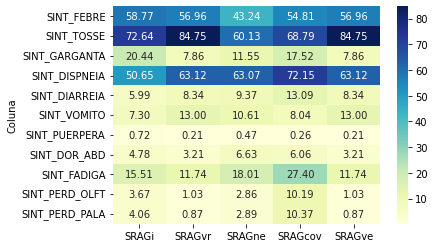

In [59]:
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [64]:
# lista de dataframes com nome atribuído
dfs = [
    (SRAGi, 'SRAGi'),
    (SRAGvr, 'SRAGvr'),
    (SRAGne, 'SRAGne'),
    (SRAGcov, 'SRAGcov'),
    (SRAGve, 'SRAGve')
]

results_cronic = [df[0].filter(regex='^CRONIC').apply(lambda x: (x == 'Sim').mean() * 100).round(2) for df in dfs]

# concatenando
result_cronic = pd.concat(results_cronic, axis=1, keys=[df[1] for df in dfs])
result_cronic.index.name = 'Coluna'

print(result_cronic)

                   SRAGi  SRAGvr  SRAGne  SRAGcov  SRAGve
Coluna                                                   
CRONIC_CARDIOPATI  18.51    5.54   25.50    28.98    5.54
CRONIC_SIND_DOWN    0.14    0.79    0.38     0.26    0.79
CRONIC_HEPATICA     0.82    0.31    1.01     0.61    0.31
CRONIC_ASMA         5.32    5.83    5.10     2.23    5.83
CRONIC_DIABETES    11.02    2.67   16.22    20.29    2.67
CRONIC_NEUROLOGIC   3.62    2.88    5.39     2.59    2.88
CRONIC_PNEUMOPATI   4.16    2.46    5.37     2.38    2.46
CRONIC_IMUNODEPRE   2.17    1.68    3.30     1.68    1.68
CRONIC_RENAL        2.51    0.91    3.47     2.57    0.91


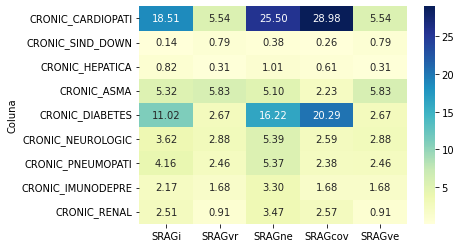

In [61]:
sns.heatmap(result_cronic, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

######8. Como está os casos de SRAG em crianças até 5 anos?

In [93]:
dados[dados['IDADE'] == '[0,5]']['CLASSI_FINAL'].value_counts()

SRAG não especificado                56665
SRAG por outro vírus respiratório    11794
SRAG por covid-19                     8690
SRAG por outro agente etiológico       480
SRAG por influenza                     275
Name: CLASSI_FINAL, dtype: int64

In [94]:
dados[dados['IDADE'] == '[0,5]']['EVOLUCAO'].value_counts()

Cura                       69974
Ignorado                    2839
Óbito                       1153
Óbito por outras causas      345
Name: EVOLUCAO, dtype: int64

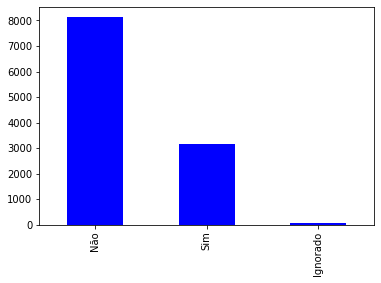

In [95]:
SRAGvr[SRAGvr['IDADE'] == '[0,5]']['UTI'].value_counts().plot(kind = 'bar', 
                                                                                 color = ['blue']);